In [27]:
import yt
import numpy as np
import math
import matplotlib.pyplot as plt

In [88]:
def return_data(folder,size,lo,hi,field):    
    ds = yt.load(folder)
    ad = ds.all_data()
    df=ad.to_dataframe(fields=field)
    data=np.zeros((size[0],size[1],size[2]))
    dataraw=np.zeros((size[0]*size[1]*size[2]))
    for i in range(size[0]):
        for j in range(size[1]):
            for k in range(size[2]):
                data[i,j,k]=df.iat[i*size[2]*size[1]+j*size[2]+k,0]
                
    for i in range(size[0]*size[1]*size[2]):
        dataraw[i]=df.iat[i,0]
                
    xCell=(hi[0]-lo[0])/size[0]
    yCell=(hi[1]-lo[1])/size[1]
    zCell=(hi[2]-lo[2])/size[2]
    
    xGrid = np.linspace(lo[0]+0.5*xCell,hi[0]-0.5*xCell,size[0])
    yGrid = np.linspace(lo[1]+0.5*yCell,hi[1]-0.5*yCell,size[1])
    zGrid = np.linspace(lo[2]+0.5*zCell,hi[2]-0.5*zCell,size[2])
    
    return xGrid, yGrid, zGrid, data, dataraw


In [141]:
def return_y_slice(folder,size,lo,hi,field,sl):    
    ds = yt.load(folder)
    ad = ds.all_data()
    df=ad.to_dataframe(fields=field)
    data=np.zeros((size[2],size[0]))
    for i in range(size[0]):
        for k in range(size[2]):
            data[k,i]=df.iat[i*size[2]*size[1]+sl*size[2]+k,0]
                            
    xCell=(hi[0]-lo[0])/size[0]
    zCell=(hi[2]-lo[2])/size[2]
    
    xGrid = np.linspace(lo[0]+0.5*xCell,hi[0]-0.5*xCell,size[0])
    zGrid = np.linspace(lo[2]+0.5*zCell,hi[2]-0.5*zCell,size[2])
    
    return xGrid, zGrid, data

In [149]:
dir = "~/temp"
time = "/plt0000020/"
xtest1, ztest1, datatest1 = return_y_slice(dir+time,[64,64,128],[0,0,0],[0.025,0.025,0.05],"c1",32)

yt : [INFO     ] 2022-11-05 17:14:09,984 Parameters: current_time              = 2.0000000000000005e-05
yt : [INFO     ] 2022-11-05 17:14:09,985 Parameters: domain_dimensions         = [ 64  64 128]
yt : [INFO     ] 2022-11-05 17:14:09,986 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-11-05 17:14:09,987 Parameters: domain_right_edge         = [0.025 0.025 0.05 ]


In [147]:
X,Z=np.meshgrid(xtest1,ztest1)

<ipython-input-148-779d1fe7cef4>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Z, datatest1)


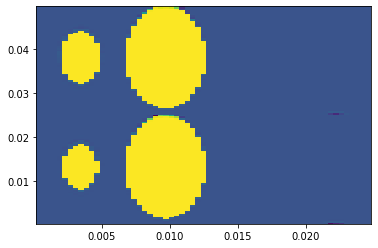

In [148]:
plt.pcolor(X, Z, datatest1)
plt.show()

In [136]:
len(dataslice[0])

128

In [138]:
len(X[0])

64

In [157]:
datatest1[127]

array([ 1.17601722e-29,  1.83125878e-25, -4.15448760e-23, -2.23130724e-20,
       -4.54227017e-18,  9.40185811e-17,  2.73446626e-15,  8.13178699e-15,
        9.90219896e-15, -9.24470832e-16,  1.25120406e-16,  1.10360355e-18,
        4.64174388e-21,  1.99919254e-23, -2.90695010e-26,  1.34628491e-30,
       -1.96470706e-13, -1.11279360e-09,  9.39274347e-07, -5.39723868e-04,
        2.86243288e-02,  6.73434137e-03,  6.62784570e-01,  2.51577117e-01,
        3.57447702e-01,  1.64747214e-01, -1.55118557e-01,  3.74655704e-03,
       -4.23111866e-05, -2.74643353e-07,  1.67189951e-10,  8.13178699e-15,
       -3.59115708e-34,  1.35815178e-31, -5.55959729e-28, -1.64898853e-25,
       -1.07444029e-23, -9.74376016e-23,  9.75533448e-21,  3.26146484e-20,
        3.30785250e-20,  5.06265180e-22,  1.65307163e-22,  9.45051602e-25,
       -2.60666855e-26, -6.97815766e-30,  3.45800756e-32,  4.63637698e-35,
       -3.49804667e-19, -1.52599392e-15,  1.52449622e-13, -1.60515846e-10,
        2.21895492e-08, -

In [34]:
dataslice.reshape(64,128)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
len(datashape)

TypeError: object of type 'NoneType' has no len()

In [38]:
z = np.array([i*i+j*j for j in ztest1 for i in xtest1])

In [39]:
z

array([7.62939453e-08, 3.81469727e-07, 9.91821289e-07, ...,
       3.05763245e-03, 3.07655334e-03, 3.09577942e-03])

In [42]:
len(z.reshape(64,128))

64

In [98]:
dataslice2

array([[-4.03604952e-19,  3.29205571e-18, -2.24974680e-17, ...,
         6.28808418e-13, -7.82300917e-14,  7.26219331e-15],
       [-2.21513770e-15,  1.82450833e-14, -7.70725700e-14, ...,
         5.95861607e-09, -7.16070526e-10,  1.83497408e-10],
       [ 3.30162315e-13,  1.11272038e-11,  2.47318598e-12, ...,
         9.23153914e-06,  9.24806235e-08, -2.80098052e-07],
       ...,
       [ 1.38926405e-23, -2.66161566e-24,  4.31214323e-25, ...,
         3.38278891e-31, -3.91428014e-30,  4.58979638e-29],
       [-3.18417714e-26,  4.39877709e-27, -7.95677270e-28, ...,
         9.36312597e-34, -7.28419033e-33,  3.15382859e-32],
       [ 6.11590958e-30, -3.22366409e-30,  7.74428279e-31, ...,
        -6.69394170e-40, -2.51332923e-36,  4.01689133e-35]])

<ipython-input-75-6953e716a7b0>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, Z)


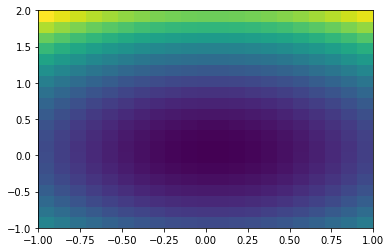

In [75]:
x = np.linspace(-1, 1, 22)
y = np.linspace(-1, 2, 21)
z = np.array([i*i+j*j for j in y for i in x])

X, Y = np.meshgrid(x, y)
Z = z.reshape(21, 22)

plt.pcolor(X, Y, Z)
plt.show()


In [53]:
len(Z[0])

21

In [54]:
len(dataslice[0])

128

In [56]:
64*128

8192

In [62]:
y

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [64]:
Y[1]

array([-0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9,
       -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9, -0.9])